1/1 [==============================] - 0s 187ms/step
Similarity between images: 100.00%


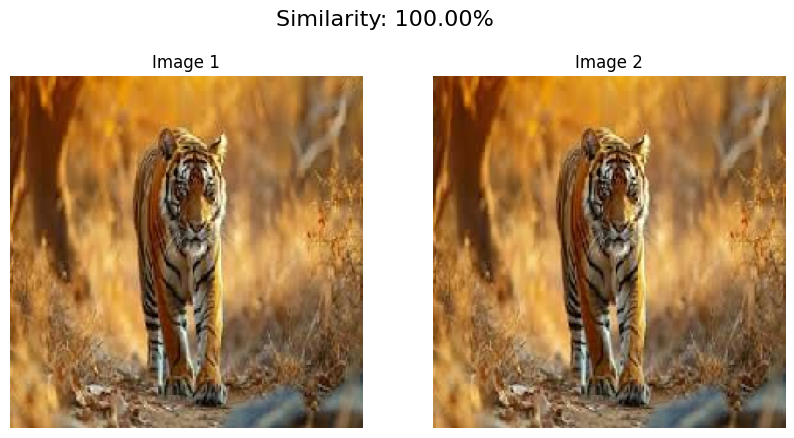

In [9]:
# 🧠 Import dependencies
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# ✅ Load VGG16 model without top classifier
model = VGG16(weights='imagenet', include_top=False, pooling='max')

# 🔍 Function to extract normalized feature vector from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features[0] / norm(features[0])

# 📸 Paths to two images (make sure these exist)
img1_path = "image-1.png"
img2_path = "image-2.png"

# 🧪 Extract features
feat1 = extract_features(img1_path)
feat2 = extract_features(img2_path)

# 📊 Calculate cosine similarity
similarity = 1 - cosine(feat1, feat2)
print(f"Similarity between images: {similarity * 100:.2f}%")

# 🎨 Optional: show both images
def show_images(path1, path2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    img1 = image.load_img(path1, target_size=(224, 224))
    img2 = image.load_img(path2, target_size=(224, 224))
    axes[0].imshow(img1)
    axes[0].set_title("Image 1")
    axes[0].axis("off")
    axes[1].imshow(img2)
    axes[1].set_title("Image 2")
    axes[1].axis("off")
    plt.suptitle(f"Similarity: {similarity * 100:.2f}%", fontsize=16)
    plt.show()

show_images(img1_path, img2_path)
